<div style="text-align: center;">
  <h2>Autor: William Nabhan Filho</h2>
</div>

## 1. Importando Bibliotecas e Módulos

In [1]:
import os, sys

sys.path.append(os.path.abspath('..'))

from src.eda_visualizations import plot_count_by_column, plot_media_por_grupo, plot_heatmap_pedidos, \
plot_top_populares, plot_top_populares_2, plot_histograma_com_media, plot_dispersao_interativo

import pandas as pd

## 2. Preparação dos dados

### 2.1 Carregando e checando os dados

In [2]:
data = pd.read_parquet('../data/processed/data.parquet')

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4986345 entries, 0 to 4986344
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   order_id                int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_name            object 
 7   aisle                   object 
 8   department              object 
 9   add_to_cart_order       int64  
 10  reordered               int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 418.5+ MB


In [4]:
data.head(10)

user_id  order_id  order_number  order_dow  order_hour_of_day  \
0        1         1             1          3                 12   
1        1         1             1          3                 12   
2        1         1             1          3                 12   
3        1         1             1          3                 12   
4        1         1             1          3                 12   
5        1         1             1          3                 12   
6        1         1             1          3                 12   
7        1         1             1          3                 12   
8        1         1             1          3                 12   
9        1         1             1          3                 12   

   days_since_prior_order              product_name  \
0                     NaN  Organic Raw Agave Nectar   
1                     NaN              Organic Soba   
2                     NaN       Organic Red Cabbage   
3                     NaN  Organic Shredded Carrots   
4                     NaN         Organic Red Onion   
5                     NaN           Red Raspberries   
6                     NaN          Organic Cilantro   
7                     NaN      Organic Blackberries   
8                     NaN      Whole Vitamin D Milk   
9                     NaN                    Jicama   

                        aisle     department  add_to_cart_order  reordered  
0       honeys syrups nectars         pantry                  1          0  
1                 asian foods  international                  2          0  
2            fresh vegetables        produce                  3          0  
3  packaged vegetables fruits        produce                  4          0  
4            fresh vegetables        produce                  5          0  
5  packaged vegetables fruits        produce                  6          0  
6                 fresh herbs        produce                  7          0  
7                fresh fruits        produce                  8          0  
8                        milk     dairy eggs                  9          0  
9            fresh vegetables        produce                 10          0

In [5]:
data.columns

Index(['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle', 'department',
       'add_to_cart_order', 'reordered'],
      dtype='object')

In [6]:
data.describe()

user_id      order_id  order_number     order_dow  \
count  4.986345e+06  4.986345e+06  4.986345e+06  4.986345e+06   
mean   1.496107e+04  2.466366e+05  1.743938e+01  2.745074e+00   
std    8.646133e+03  1.420754e+05  1.782773e+01  2.086846e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    7.424000e+03  1.231120e+05  5.000000e+00  1.000000e+00   
50%    1.491100e+04  2.467510e+05  1.100000e+01  3.000000e+00   
75%    2.238200e+04  3.692960e+05  2.400000e+01  5.000000e+00   
max    3.000000e+04  4.928170e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  add_to_cart_order  \
count       4.986345e+06            4.683335e+06       4.986345e+06   
mean        1.341794e+01            1.126415e+01       8.312034e+00   
std         4.251211e+00            8.909349e+00       7.019255e+00   
min         0.000000e+00            0.000000e+00       1.000000e+00   
25%         1.000000e+01            5.000000e+00       3.000000e+00   
50%         1.300000e+01            8.000000e+00       6.000000e+00   
75%         1.600000e+01            1.500000e+01       1.100000e+01   
max         2.300000e+01            3.000000e+01       9.300000e+01   

          reordered  
count  4.986345e+06  
mean   5.916606e-01  
std    4.915266e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    1.000000e+00  
75%    1.000000e+00  
max    1.000000e+00

In [7]:
data.nunique()

user_id                    30000
order_id                  492817
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_name               44439
aisle                        134
department                    21
add_to_cart_order             93
reordered                      2
dtype: int64

In [8]:
data.isnull().sum()

user_id                        0
order_id                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    303010
product_name                   0
aisle                          0
department                     0
add_to_cart_order              0
reordered                      0
dtype: int64

In [9]:
# Filtrando os registros onde days_since_prior_order é nulo
nulos = data[data['days_since_prior_order'].isnull()]

# Verificando se todos esses registros têm order_number igual a 1
(nulos['order_number'] == 1).all()

True

In [10]:
#Verificando se um pedido contem mais de um mesmo produto (já que não tem coluna de qtde)
pedidos_com_repetidos = (
    data[data.duplicated(subset=['order_id', 'product_name'], keep=False)]
    ['order_number']
    .nunique()
)

print(f"Número de pedidos com produtos duplicados: {pedidos_com_repetidos}")

Número de pedidos com produtos duplicados: 0


In [11]:
#Verificando se um mesmo pedido contem mais de um 'user_id', 'order_hour_of_day', 'order_dow' ou 'days_since_prior_order'
verificacao = data.groupby('order_id').agg({
    'order_hour_of_day': pd.Series.nunique,
    'order_dow': pd.Series.nunique,
    'days_since_prior_order': pd.Series.nunique,
    'user_id': pd.Series.nunique
})

# Filtrar apenas os que têm mais de 1 valor único (inconsistentes)
inconsistentes = verificacao[
    (verificacao['order_hour_of_day'] > 1) | 
    (verificacao['order_dow'] > 1) | 
    (verificacao['days_since_prior_order'] > 1)|
    (verificacao['user_id'] > 1)
]

print(f"Número de pedidos com valores de 'order_hour_of_day', 'order_dow', 'days_since_prior_order' e/ou 'user_id' conflitantes: {len(inconsistentes)}")

Número de pedidos com valores de 'order_hour_of_day', 'order_dow', 'days_since_prior_order' e/ou 'user_id' conflitantes: 0


In [12]:
# Verificando se existe um mesmo 'aisle' em 'department' distintos
verificacao = (
    data.groupby('aisle')['department']
    .nunique()
    .reset_index()
)

# Filtrando apenas os que aparecem em mais de um 'department'
aisles_multiplos_departments = verificacao[verificacao['department'] > 1]

print(f"Número de 'aisle' em 'department' distintos: {aisles_multiplos_departments.shape[0]}")

Número de 'aisle' em 'department' distintos: 0


In [13]:
# Verificando se existe um mesmo 'product_name' em 'aisle' distintos
verificacao = (
    data.groupby('product_name')['aisle']
    .nunique()
    .reset_index()
)

# Filtra apenas os que aparecem em mais de um 'department'
products_multiplos_aisles = verificacao[verificacao['aisle'] > 1]

print(f"Número de 'product_name' em 'aisle' distintos: {products_multiplos_aisles.shape[0]}")

Número de 'product_name' em 'aisle' distintos: 0


In [14]:
#Analisando os valores de 'order_dow' (dia da semana do pedido)
data['order_dow'].unique()

array([3, 0, 1, 2, 5, 6, 4], dtype=int64)

In [15]:
# Lista de dias da semana começando no domingo (0) e indo até sabado (6)
dias_semana = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']

# Criando nova coluna dos dias da semana mapeando os valores
data['dia_da_semana'] = data['order_dow'].map(lambda x: dias_semana[x])

In [16]:
# Gerando um DataFrame sem duplicatas por pedido
data_by_order = data.groupby('order_id').first().reset_index()

## 3. Análise Exploratória dos Dados

### 3.1 Padrões Temporais

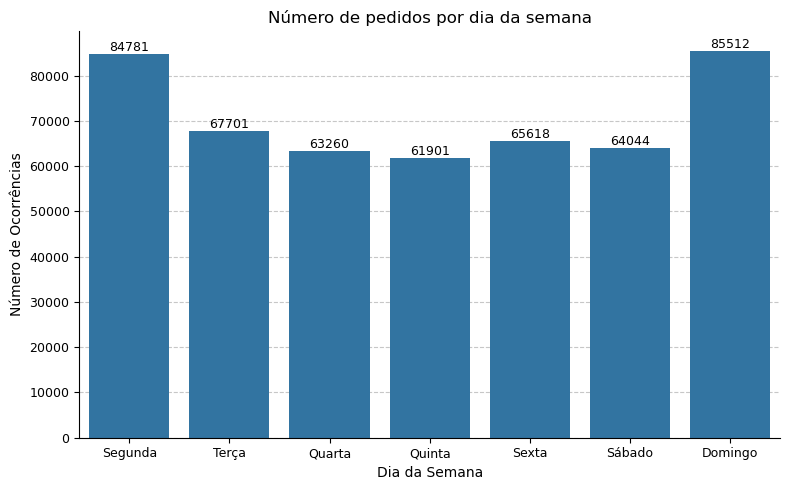

In [17]:
# Gráfico de pedidos por dia da semana
dias_ordenados = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
plot_count_by_column(data_by_order,
                     coluna='dia_da_semana',
                     titulo='Número de pedidos por dia da semana',
                     xlabel='Dia da Semana',
                     figsize = (8,5),
                     ordem=dias_ordenados)

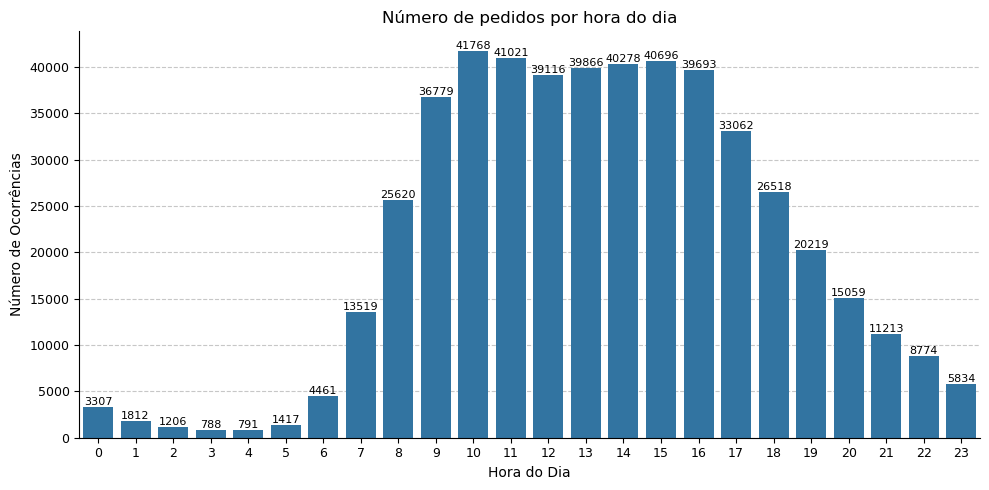

In [18]:
# Gráfico de pedidos por hora do dia
horas_ordenadas = sorted(data_by_order['order_hour_of_day'].unique())
plot_count_by_column(data_by_order,
                     coluna='order_hour_of_day',
                     titulo='Número de pedidos por hora do dia',
                     xlabel='Hora do Dia',
                     fontsize_annotate=8,
                     ordem=horas_ordenadas)

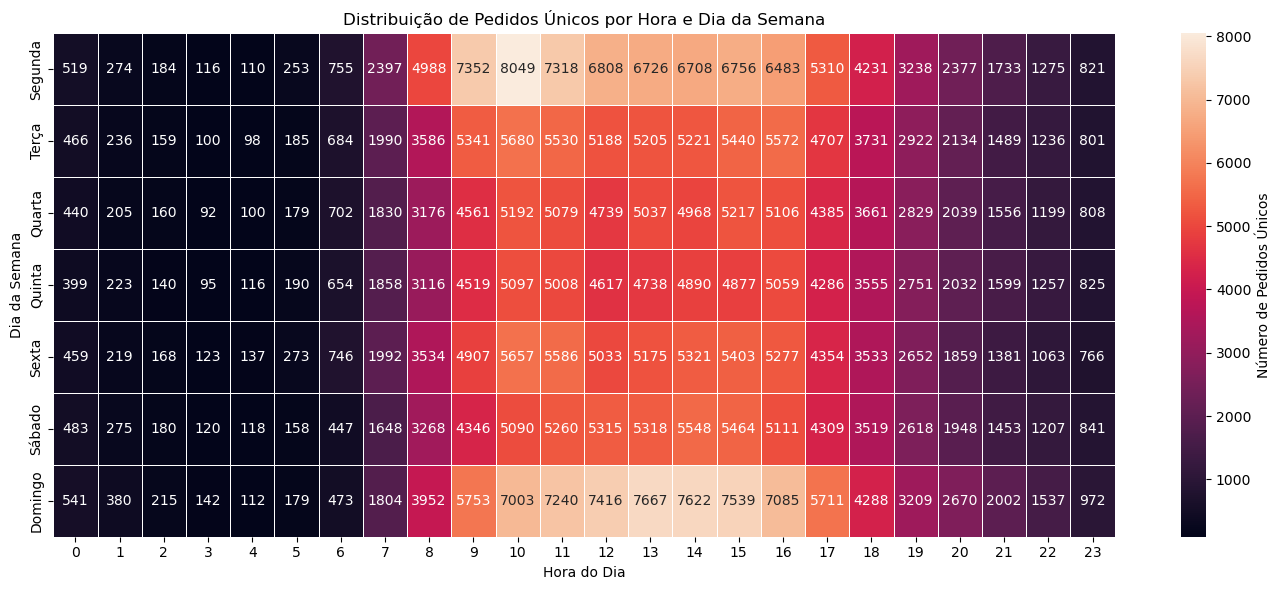

In [19]:
# Heatmap de pedidos por dia da semana e hora do dia
plot_heatmap_pedidos(data_by_order)

> Percebe-se que os pedidos ocorrem com frequência nas segundas-feiras entre 9h e 11h e nas sextas-feiras entre 11h e 15h.

### 3.2 Produtos | Seções | Departamentos Populares

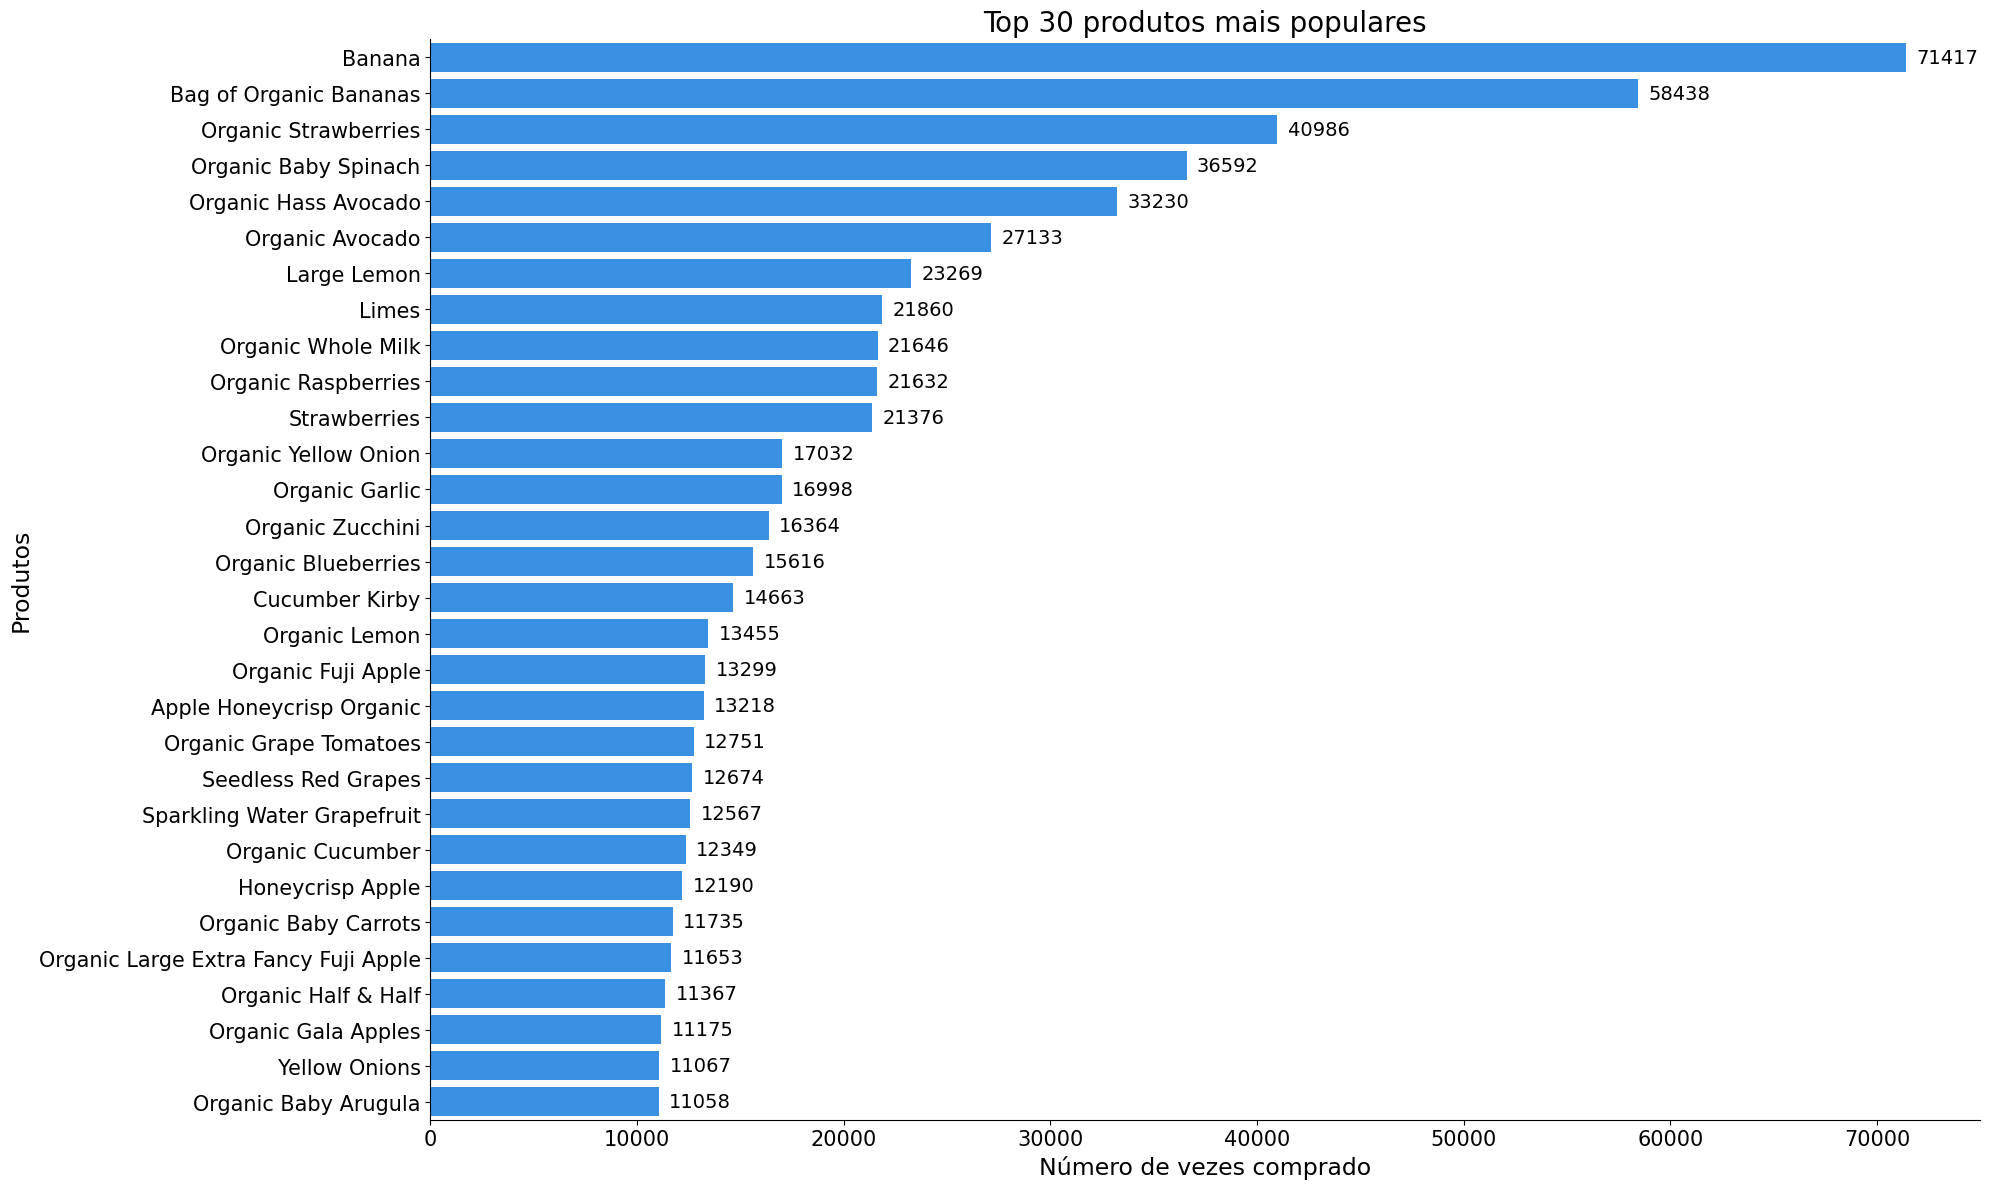

In [20]:
# Produtos mais comprados
plot_top_populares(data, coluna='product_name', nome_col_titulo = 'produtos', top_n=30)

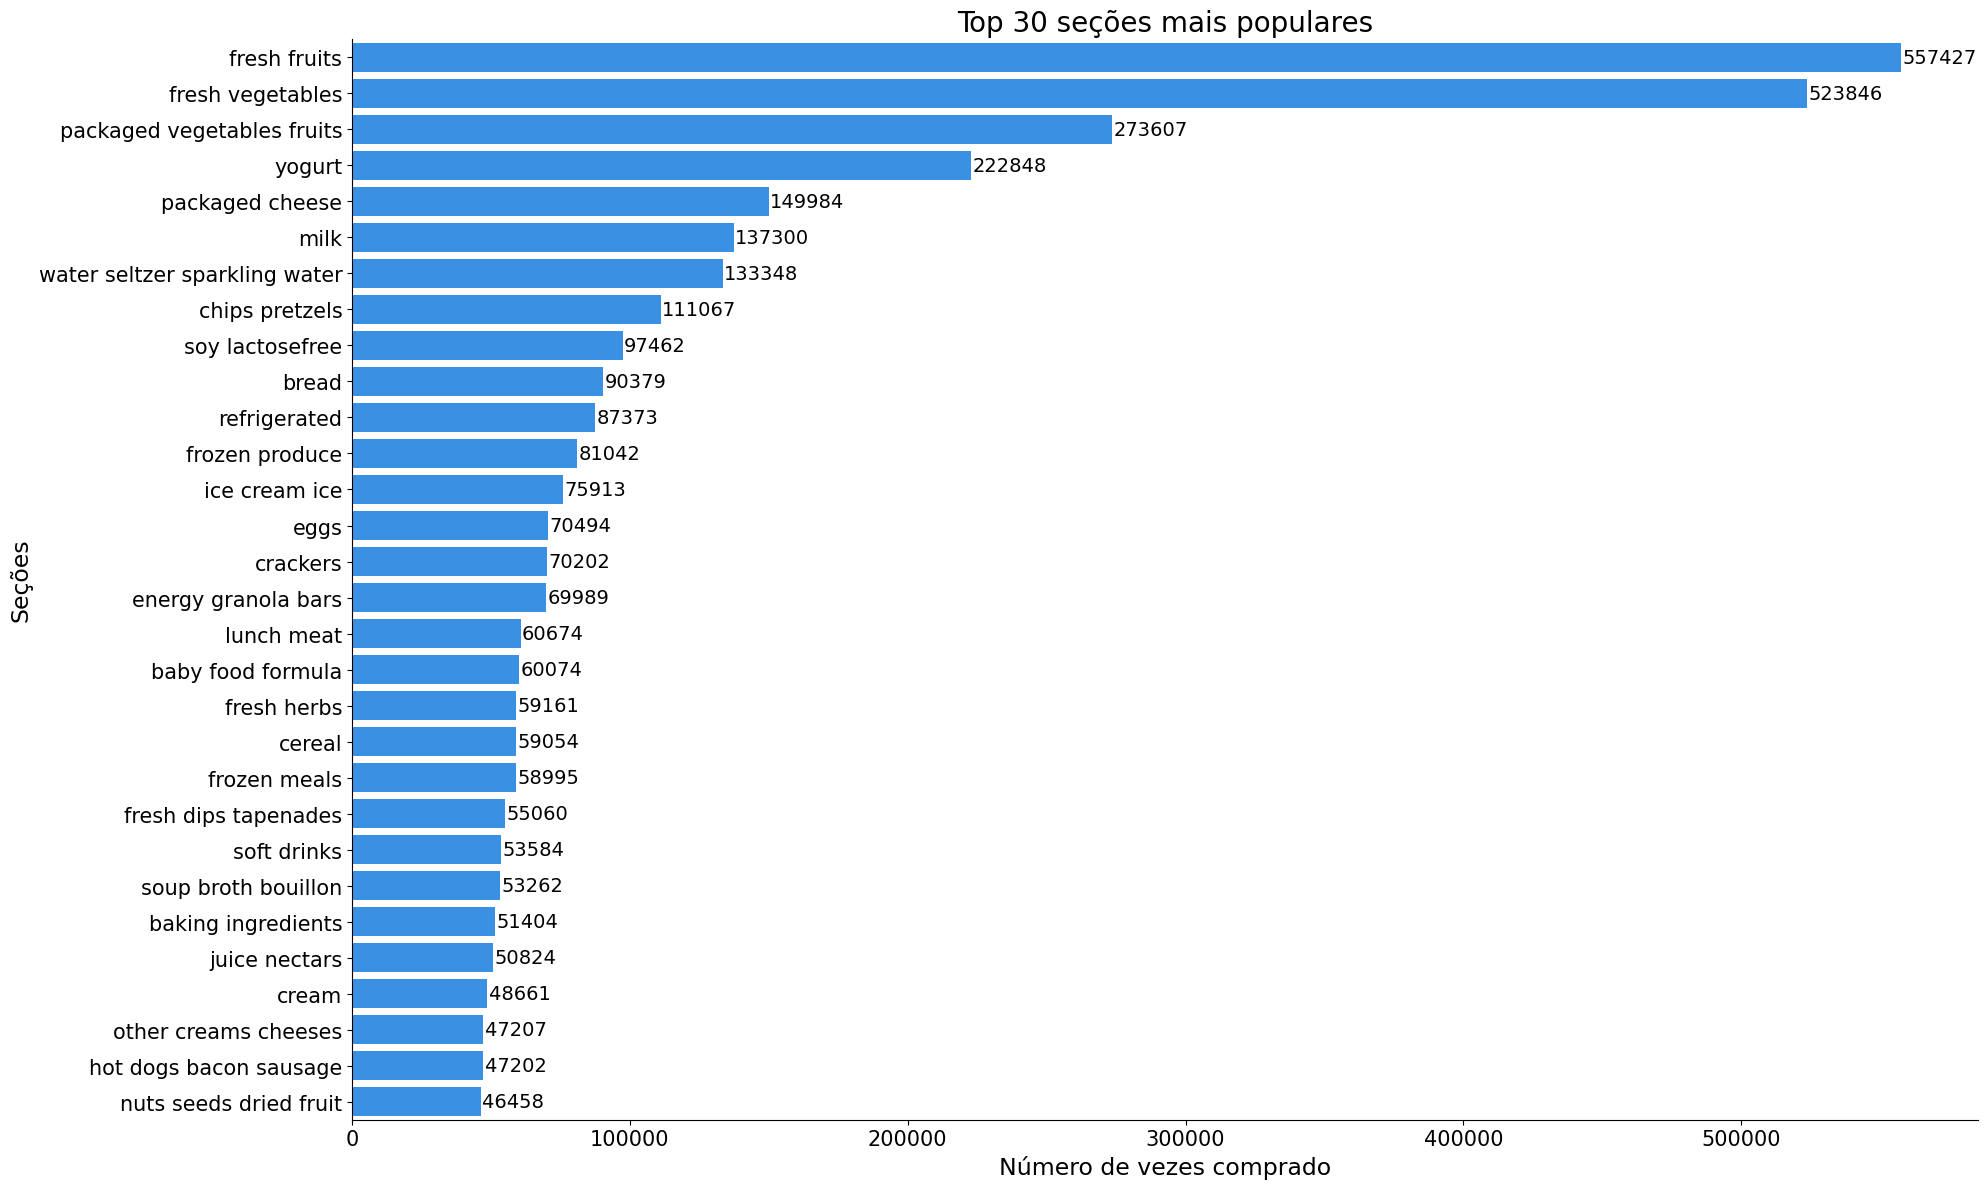

In [21]:
# Seções mais compradas
plot_top_populares(data, coluna='aisle', nome_col_titulo = 'seções', top_n=30)

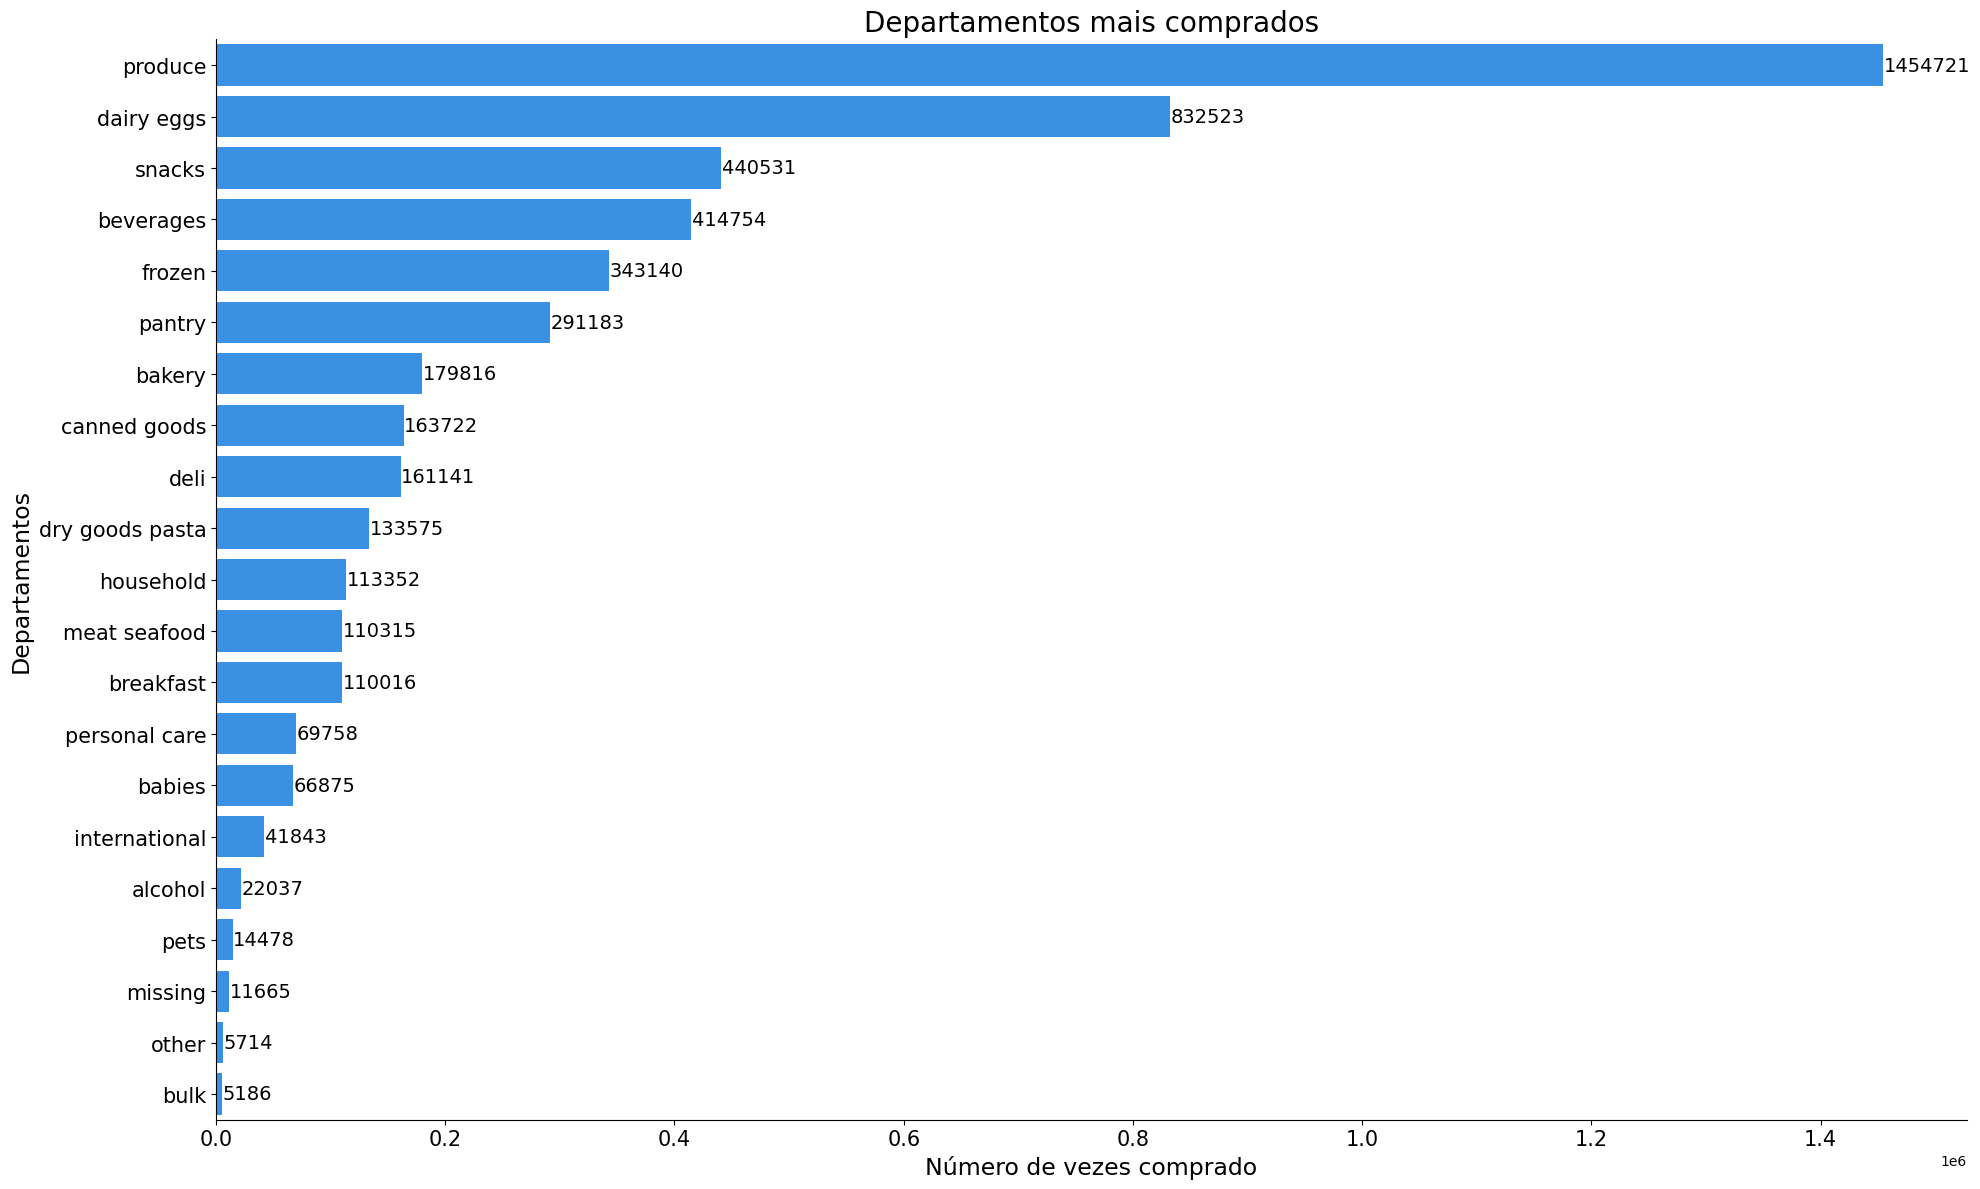

In [22]:
# Departamentos mais comprados
plot_top_populares(data, coluna='department', titulo='Departamentos mais comprados')

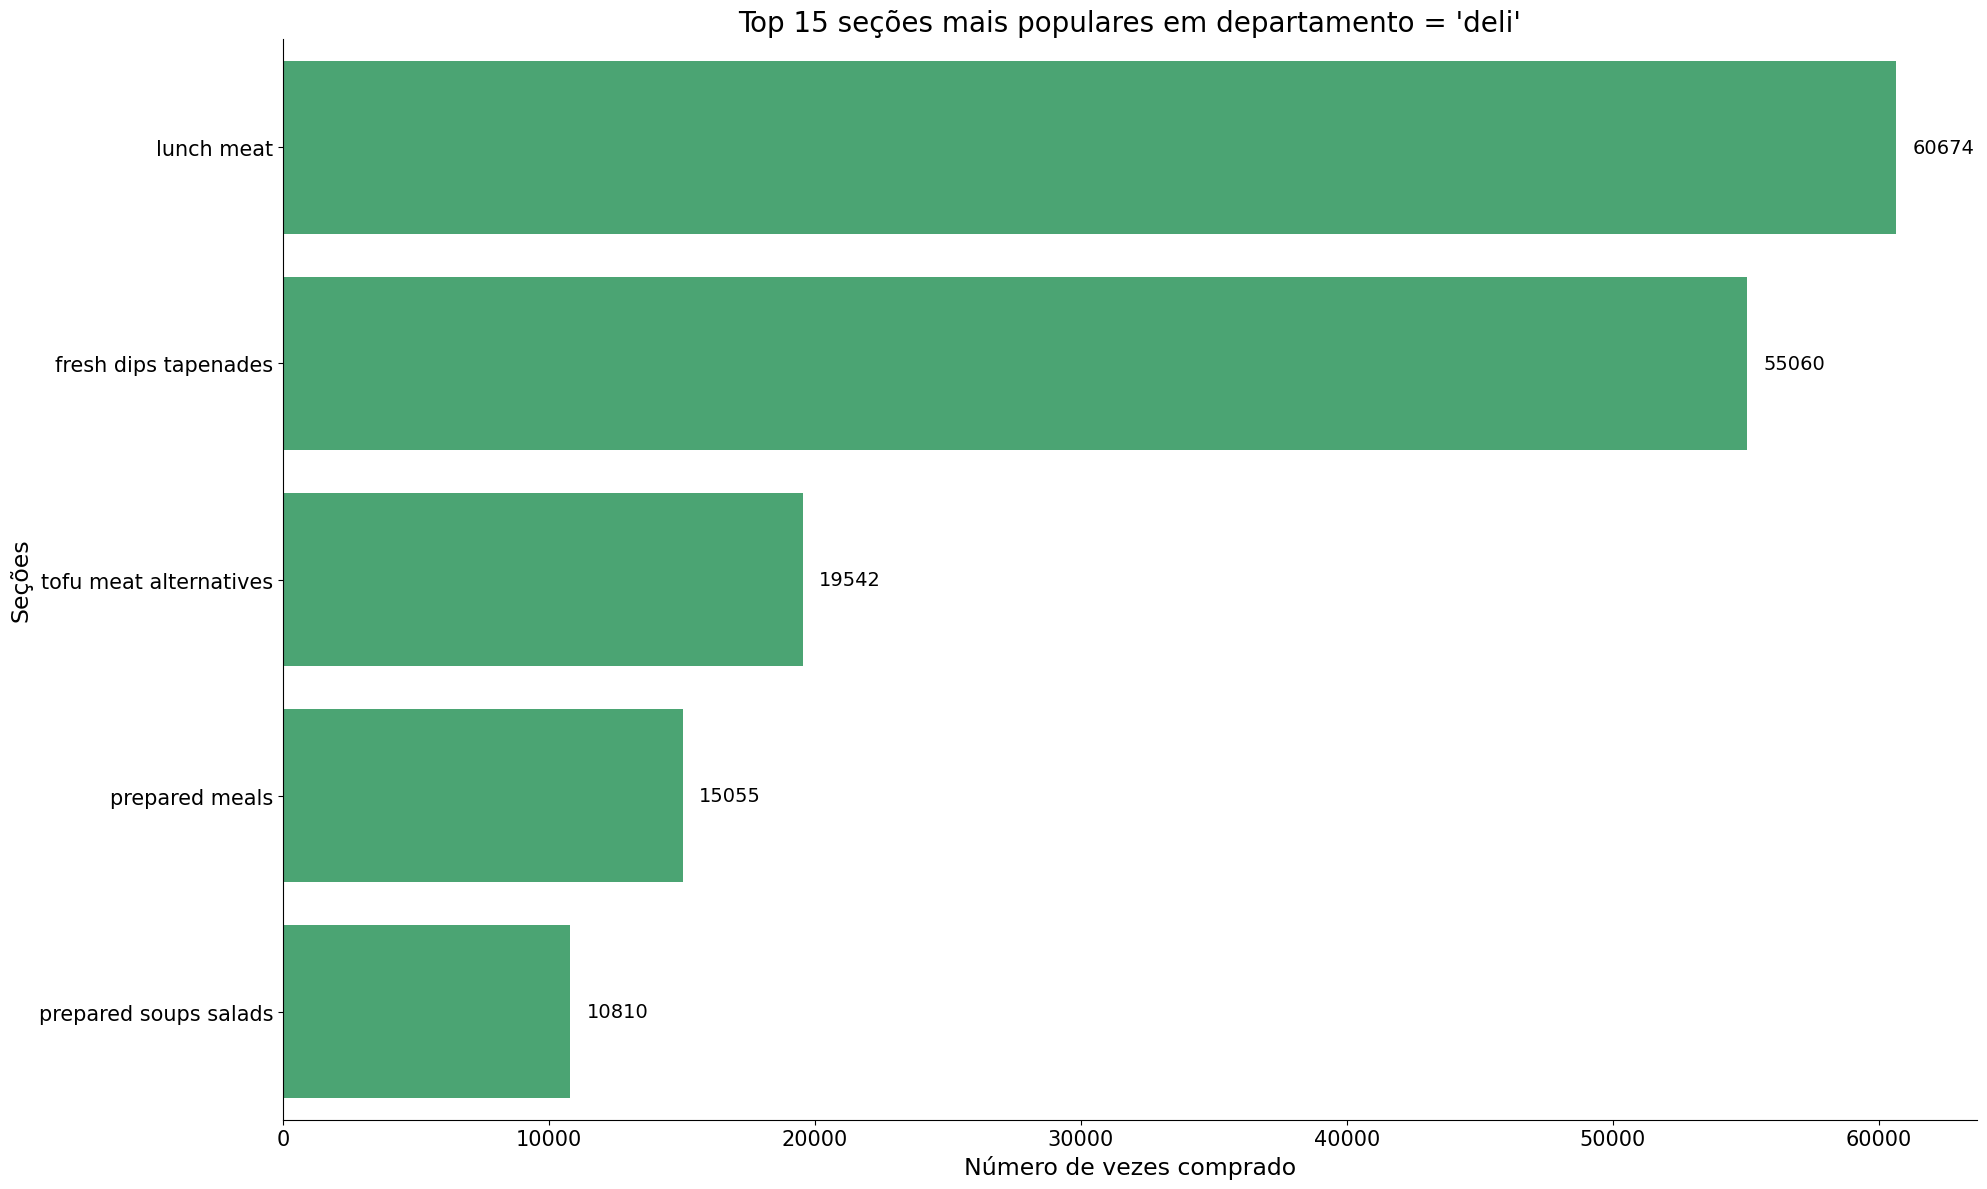

In [23]:
# Top seções (aisle) no departamento (department) "deli"
plot_top_populares_2(
    df=data,
    coluna_referencia='department',
    filtro_coluna_referencia = 'deli',
    coluna_detalhe='aisle',
    top_n=15
)

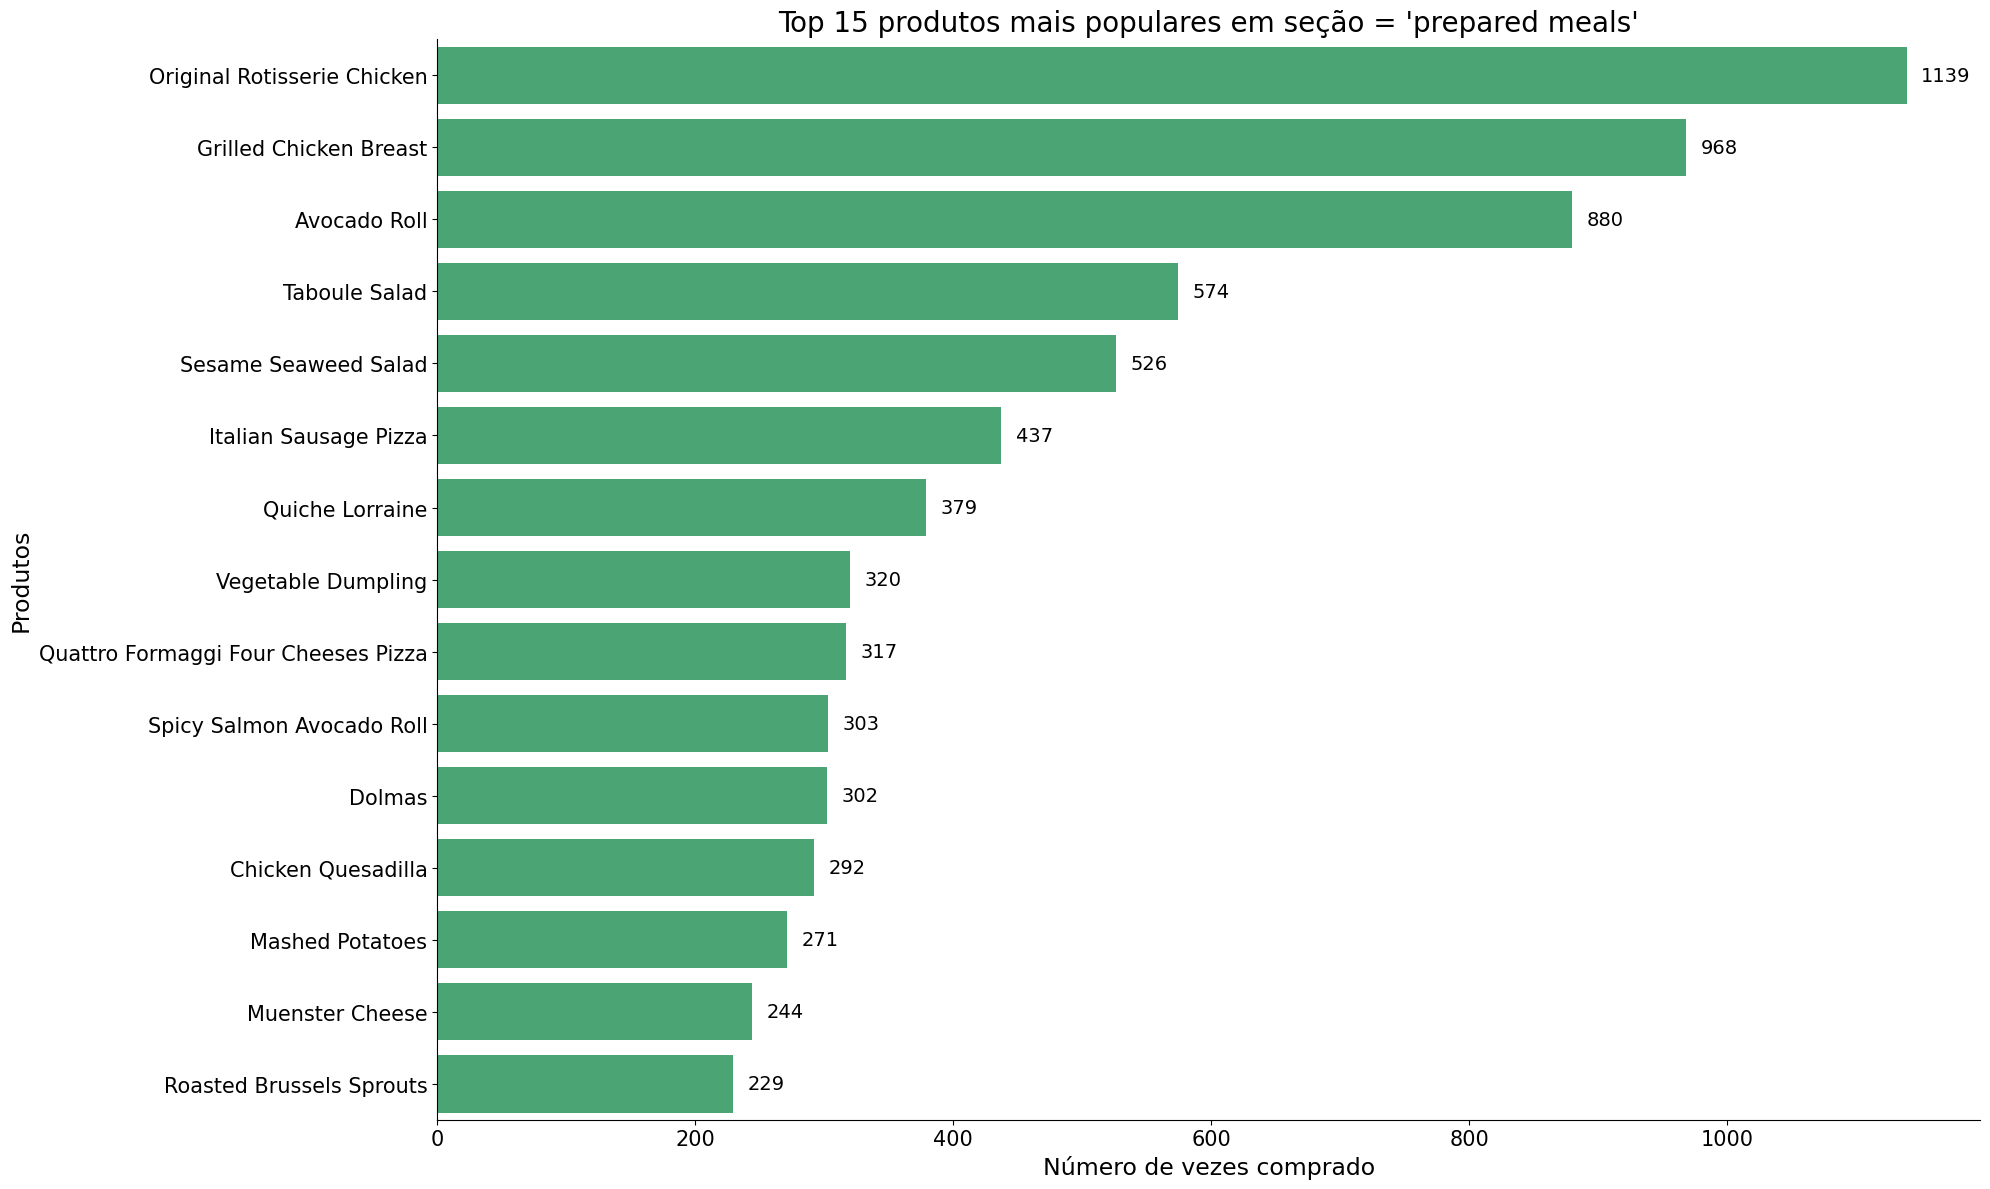

In [24]:
# Top produtos na seção "prepared meals"
plot_top_populares_2(
    df=data,
    coluna_referencia='aisle',
    filtro_coluna_referencia = 'prepared meals',
    coluna_detalhe='product_name',
    top_n=15
)

### 3.3 Comportamento dos Clientes

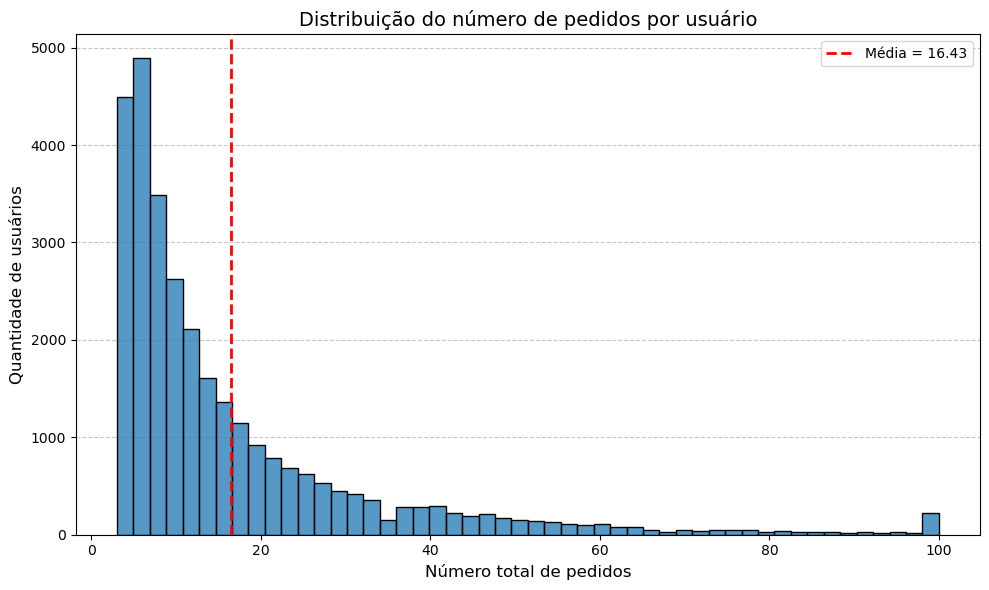

In [25]:
# Número de pedidos por usuário
pedidos_por_usuario = data.groupby('user_id')['order_number'].max()
plot_histograma_com_media(
    serie=pedidos_por_usuario,
    titulo='Distribuição do número de pedidos por usuário',
    xlabel='Número total de pedidos',
    ylabel='Quantidade de usuários',
    bins=50
)

>**Pela quebra da distribuição natural, claramente o valor 100 para 'order_number' parece estar funcionando como um 'place holder', indicando que o sistema limitou ou truncou os valores reais maiores que 100. Assim, o valor da média do número total de pedidos deve ser maior que 16,43.**

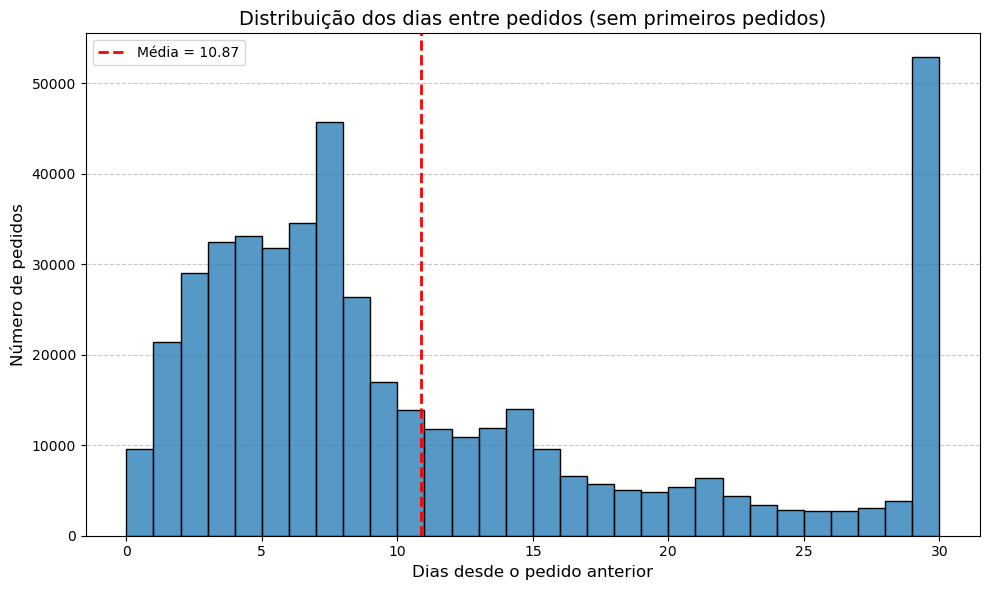

In [26]:
# Dias entre pedidos (sem primeiros pedidos (NaN para 'days_since_prior_order'))
filtro = data[data['order_number'] != 1]
dias_por_pedido = filtro.groupby('order_id')['days_since_prior_order'].first()
plot_histograma_com_media(
    serie=dias_por_pedido,
    titulo='Distribuição dos dias entre pedidos (sem primeiros pedidos)',
    xlabel='Dias desde o pedido anterior',
    ylabel='Número de pedidos',
)

>**Pela quebra da distribuição natural, claramente o valor 30 para 'days_since_prior_order' parece estar funcionando como um 'place holder', indicando que o sistema limitou ou truncou os valores reais maiores que 30. Assim, o valor da média de dias desde o pedido anterior deve ser maior que 10,87.**

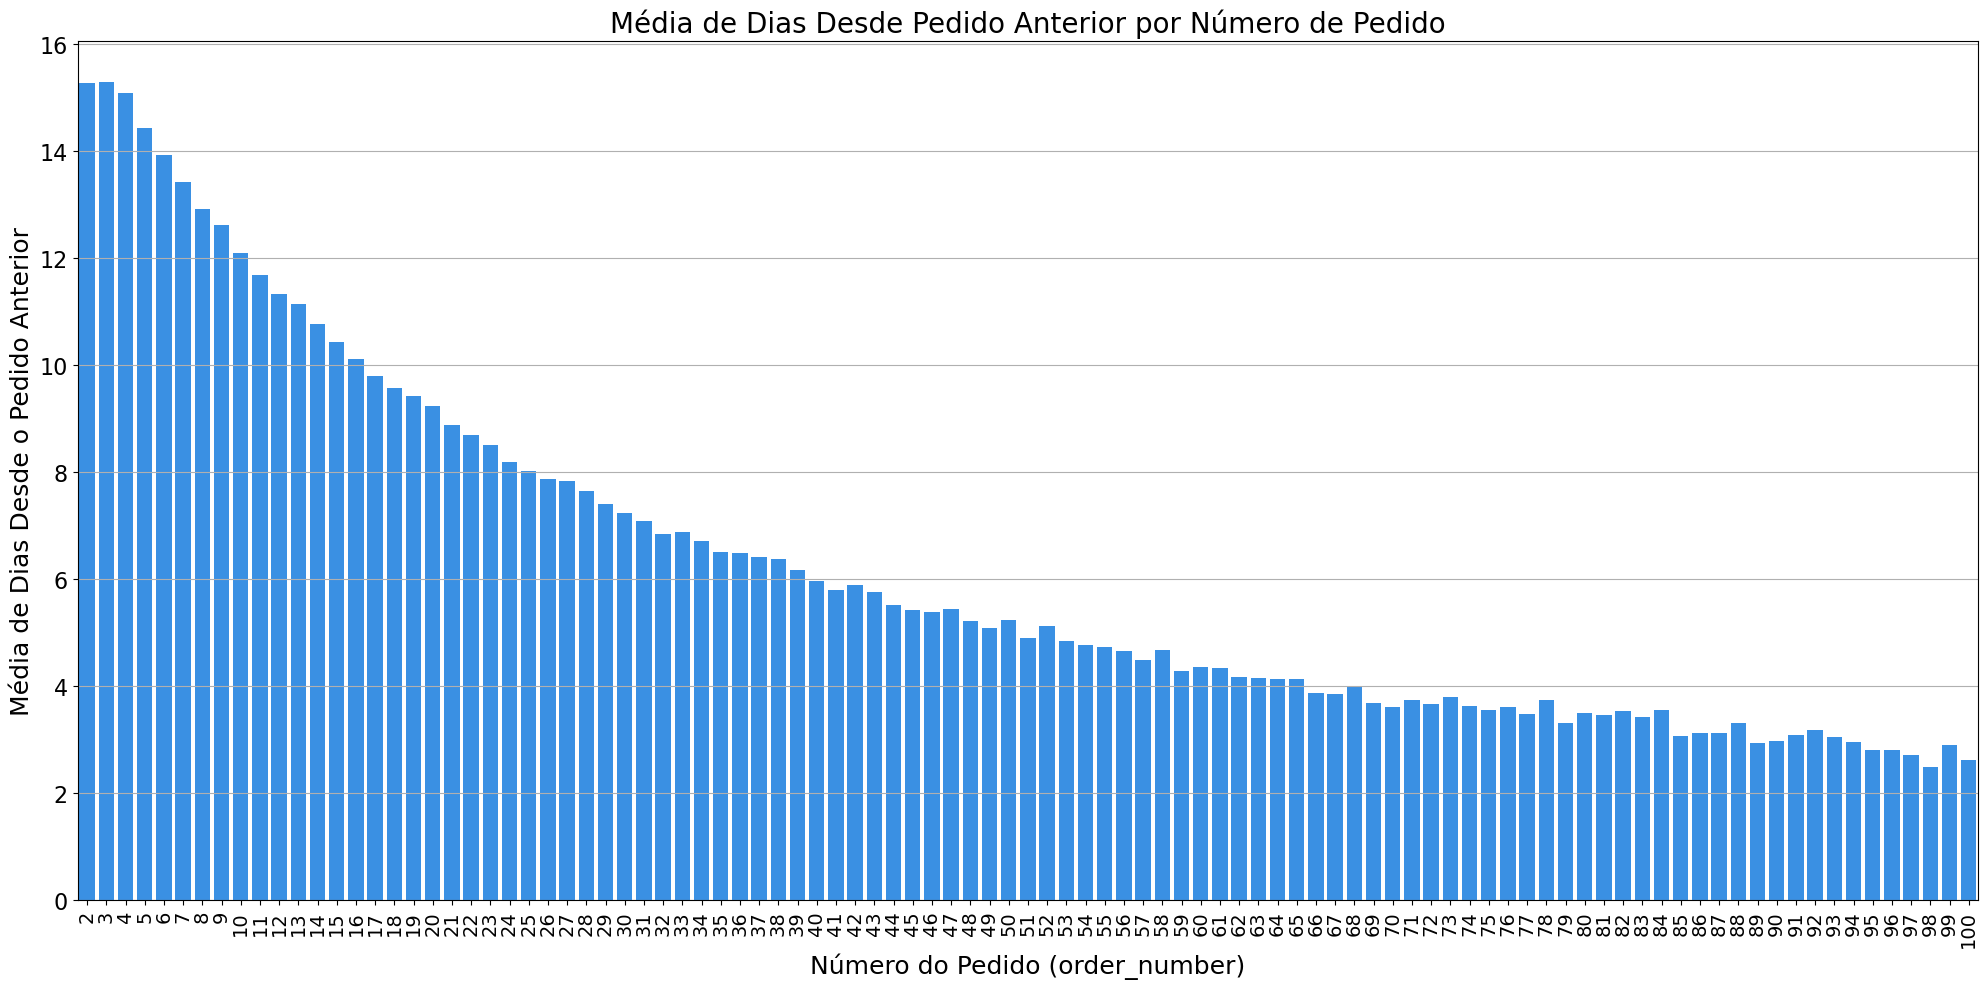

In [27]:
#Analisando o engajamento do cliente 
#(se intervalo médio de dias entre pedidos subsequentes diminui à medida que os usuários realizam mais compras)

# Removendo pedidos sem 'days_since_prior_order'
pedidos_validos = data_by_order[data_by_order['days_since_prior_order'].notna()]

# Média por número do pedido
media_por_ordem = pedidos_validos.groupby('order_number')['days_since_prior_order'].mean()

plot_media_por_grupo(
    serie=media_por_ordem,
    titulo='Média de Dias Desde Pedido Anterior por Número de Pedido',
    xlabel='Número do Pedido (order_number)',
    ylabel='Média de Dias Desde o Pedido Anterior')

>**Percebe-se do gráfico acima que conforme o usuário mais consome, mais engajado ele fica, retornando às compras em um menor intervalo de tempo.**

In [28]:
# Ranqueando os departamentos com base na quantidade de pedidos em que o primeiro produto adicionado ao carrinho pertence a eles.

# Filtrando apenas os itens que foram os primeiros adicionados ao carrinho em cada pedido
primeiros_itens = data[data['add_to_cart_order'] == 1]

# Contando quantas vezes cada departamento teve um item como primeiro
contagem_primeiros_departamentos = primeiros_itens['department'].value_counts()

# Ordenando em ordem decrescente
contagem_primeiros_departamentos = contagem_primeiros_departamentos.sort_values(ascending=False)

contagem_primeiros_departamentos

produce            138004
dairy eggs          99847
beverages           62820
snacks              34394
frozen              27426
pantry              23903
bakery              18057
deli                13568
household           12810
meat seafood        11191
canned goods         9725
breakfast            8781
personal care        8161
dry goods pasta      7926
alcohol              4990
babies               4044
international        3124
pets                 1851
missing               901
other                 758
bulk                  536
Name: department, dtype: int64

In [29]:
# Ranqueando as seções com base na média da posição em que seus produtos são adicionados ao carrinho ('add_to_cart_order') 
#nas compras em que está presente (quanto menor a média, seus produtos frequentemente são os primeiros a serem 
#adicionados no carrinho em compras que os contém).

data.groupby('aisle')['add_to_cart_order'].mean().sort_values(ascending=True).head(20)

aisle
spirits                          4.647271
packaged produce                 5.125492
specialty wines champagnes       5.228241
beers coolers                    5.258535
milk                             5.532484
white wines                      5.639490
water seltzer sparkling water    6.145417
red wines                        6.146463
soft drinks                      6.419248
eggs                             6.423923
soy lactosefree                  6.732665
energy sports drinks             6.813083
cream                            6.866731
fresh fruits                     7.128028
cold flu allergy                 7.275249
digestion                        7.275304
coffee                           7.276341
refrigerated                     7.278084
cat food care                    7.386892
muscles joints pain relief       7.394619
Name: add_to_cart_order, dtype: float64

In [30]:
# Ranqueando os departamentos com base na média da posição em que seus produtos são adicionados ao carrinho 
#nas compras em que estão presentes.

data.groupby('department')['add_to_cart_order'].mean().sort_values(ascending=True)

department
alcohol             5.431229
beverages           6.978628
dairy eggs          7.460529
pets                7.646084
produce             7.993404
bakery              8.043255
other               8.324291
bulk                8.419398
household           8.453384
meat seafood        8.463264
personal care       8.608231
deli                8.624801
frozen              8.972513
breakfast           9.068645
snacks              9.127630
missing             9.312473
pantry              9.575020
international       9.769304
canned goods        9.850057
dry goods pasta    10.172353
babies             10.295372
Name: add_to_cart_order, dtype: float64

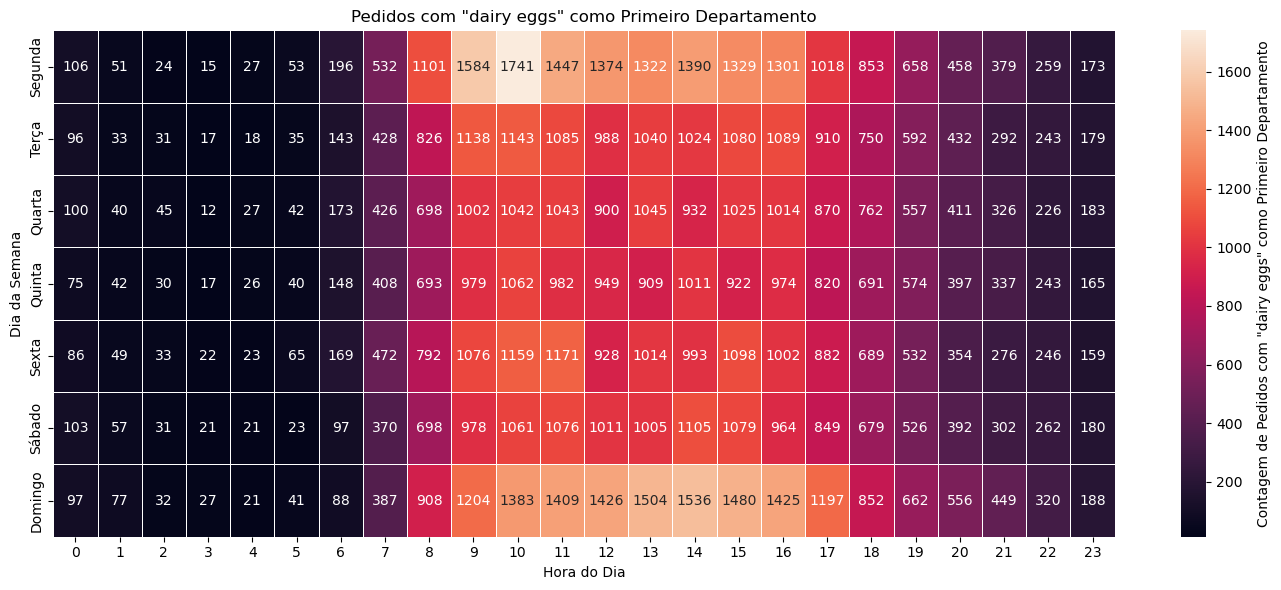

In [31]:
# Heatmap para analisar o padrão de dia e hora de compra de cliente que adicionam ovos primeiramente no carrinho
plot_heatmap_pedidos(
    df=data_by_order,
    coluna_filtro='department',
    valor_filtro='dairy eggs',
    titulo='Pedidos com "dairy eggs" como Primeiro Departamento',
    label_barra='Contagem de Pedidos com "dairy eggs" como Primeiro Departamento'
)

>**Percebe-se que esses pedidos ocorrem com mais frequencia nas segundas-feiras de manhã. 
o que faz sentido considerando que é o início da semana e laticínios são itens básicos e recorrentes na alimentação da maioria dos consumidores**.

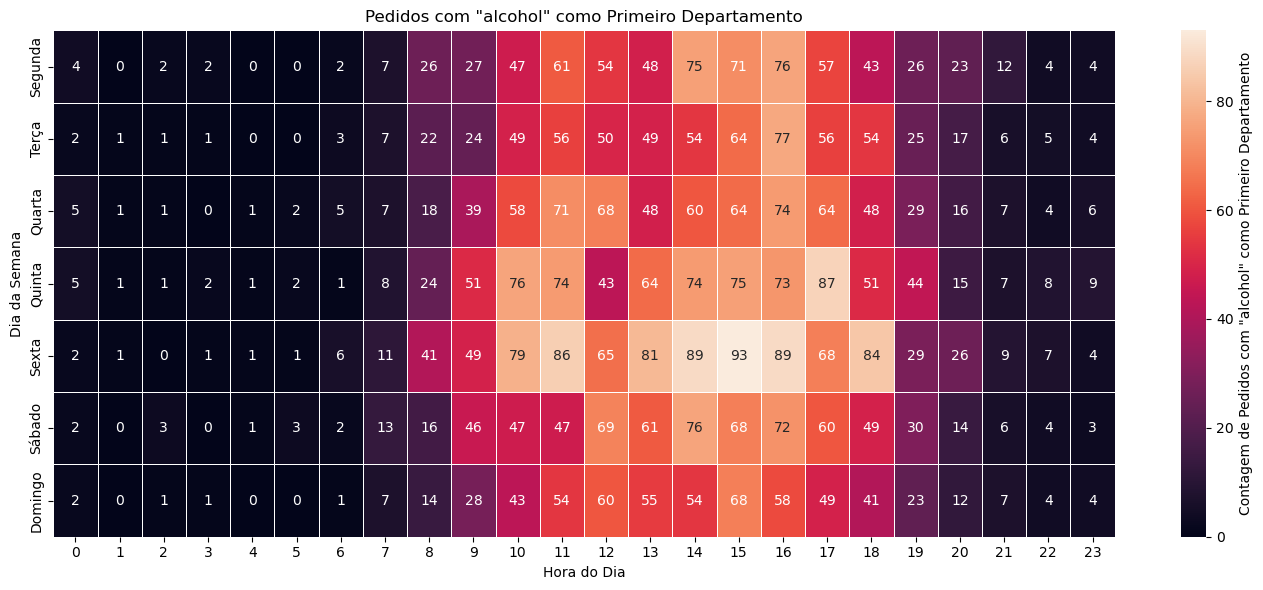

In [32]:
# Heatmap para analisar o padrão de dia e hora de compra de cliente que adicionam bebidas alcoólicas primeiramente no carrinho
plot_heatmap_pedidos(
    df=data_by_order,
    coluna_filtro='department',
    valor_filtro='alcohol',
    titulo='Pedidos com "alcohol" como Primeiro Departamento',
    label_barra='Contagem de Pedidos com "alcohol" como Primeiro Departamento'
)

>**Observa-se uma maior concentração de compras de bebidas alcoólicas às quintas e sextas-feiras, principalmente nos períodos da manhã e da tarde. Esse comportamento sugere uma preparação dos consumidores para o final de semana, refletindo padrões de consumo típicos de ocasiões sociais.**

### 3.4 Análise de Recompras

In [33]:
#Seções odenadas pela taxa de recompra (as 20 mais recorrentes)
data.groupby('aisle')['reordered'].mean().sort_values(ascending=False).head(20)

aisle
milk                             0.784392
water seltzer sparkling water    0.735444
fresh fruits                     0.720636
eggs                             0.709266
soy lactosefree                  0.694301
yogurt                           0.691978
packaged produce                 0.690757
cream                            0.687512
bread                            0.674792
refrigerated                     0.662836
white wines                      0.658521
breakfast bakery                 0.653317
energy sports drinks             0.649704
packaged vegetables fruits       0.642279
frozen breakfast                 0.633728
soft drinks                      0.633006
bulk dried fruits vegetables     0.632696
cat food care                    0.629622
prepared meals                   0.627233
baby accessories                 0.621693
Name: reordered, dtype: float64

In [34]:
#Departamentos odenados pela taxa de recompra (todos)
data.groupby('department')['reordered'].mean().sort_values(ascending=False)

department
dairy eggs         0.672849
beverages          0.655434
produce            0.651512
bakery             0.629649
deli               0.611725
pets               0.595870
babies             0.587559
snacks             0.575335
meat seafood       0.571917
alcohol            0.569588
bulk               0.565947
breakfast          0.564572
frozen             0.544469
dry goods pasta    0.465012
canned goods       0.457971
missing            0.411659
other              0.407420
household          0.402710
international      0.371340
pantry             0.349842
personal care      0.322329
Name: reordered, dtype: float64

In [35]:
#Para o ranqueamento dos produtos, optou-se por considerar apenas aqueles cuja quantidade de pedidos é maior ou igual 
#à média geral de pedidos por produto, a fim de evitar que itens com poucas vendas, mas alta taxa de recompra, 
#distorçam o desempenho no ranking.

# Calculando o total de vendas por produto
vendas_por_produto = data.groupby('product_name')['order_id'].count()

# Calculando a média de vendas de todos os produtos
media_vendas = vendas_por_produto.mean()

# Filtrando apenas os produtos que têm vendas acima da média
produtos_acima_media = vendas_por_produto[vendas_por_produto > media_vendas].index

reorder_produtos_acima_media = (
    data[data['product_name'].isin(produtos_acima_media)]
    .groupby('product_name')['reordered']
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

reorder_produtos_acima_media

product_name
Whole Wheat Multigrain Pop Cakes                  0.900709
Organic Lactose Free Whole Milk                   0.884265
Porcini & Truffle Ravioli In Egg Pasta            0.883436
Organic Homogenized Whole Milk                    0.882581
Organic Large Grade AA Eggs                       0.873016
100% Spring Water                                 0.872832
Original Acai Juice                               0.871212
Water Mineral                                     0.870283
Regular Cream Cheese Spread                       0.867550
Organic  Whole Milk                               0.863902
Food for Cats, Chicken & Herring Formula          0.860927
Farmer Cheese No Salt Added                       0.860870
Yerba Mate Sparkling Classic Gold                 0.860169
Rose Black                                        0.858757
Organic Reduced Fat Omega-3 Milk                  0.858650
Healthy Kids Organic Vanilla Nutritional Shake    0.858156
Cranberry Pomegranate Sparkling Yerba Mate 

In [36]:
#Analisando a proporção de produtos com nenhuma recompra entre o total de produtos

print(f"{((data.groupby('product_name')['reordered'].mean() == 0).sum()/(data.groupby('product_name')['reordered'].mean() >= 0).sum())*100:.2f}%")

26.94%


**Quase 1/4 dos produtos nunca são recomprados posteriormente. Uma proporção elevada que pode fazer a gestão de estoque e espaço do supermercado menos eficaz (em um cenário de compras presenciais), comprometendo a eficiência operacional e gerando imobilização de capital em estoque parado e aumento custo de armazenagem, exposição e controle.**

In [37]:
#Analisando a proporção de produtos com recompra entre o total de produtos por cliente

# Número de produtos únicos recomprados por usuário
produtos_recomprados = (
    data[data['reordered'] == 1]
    .groupby('user_id')['product_name']
    .nunique()
)

# Número de produtos únicos comprados por usuário
produtos_comprados = (
    data.groupby('user_id')['product_name']
    .nunique()
)

# Proporção de produtos únicos que foram recomprados
proporcao_recompra_unicos = (produtos_recomprados / produtos_comprados).fillna(0)

# Estatísticas descritivas dessa proporção
proporcao_recompra_unicos.describe()

count    30000.000000
mean         0.377369
std          0.175046
min          0.000000
25%          0.250000
50%          0.372093
75%          0.497214
max          1.000000
Name: product_name, dtype: float64

**Em média, menos da metade dos produtos comprados por um usuário são recomprados posteriormente.**

In [38]:
#Analisando a dispersão entre a taxa de recompra (0 a 1) e o total de compra das seções (aisle) dos produtos

# Agrupando por categoria e calcula total de pedidos e taxa média de recompra
produtos_stats = data.groupby('aisle').agg(
    total_pedidos=('order_id', 'count'),
    taxa_recompra=('reordered', 'mean')
).reset_index()

plot_dispersao_interativo(
    df=produtos_stats,
    eixo_x='total_pedidos',
    eixo_y='taxa_recompra',
    titulo='Seções de Produtos: Popularidade vs Recompra',
    xlabel='Total de Pedidos',
    ylabel='Taxa de Recompra',
    hover_data=['aisle', 'taxa_recompra', 'total_pedidos']
)

#### **Interpretando as regiões do gráfico:**
- Superior direita: Produtos essenciais (alta frequência + alta recompra).
- Superior esquerda: Produtos com potencial de fidelização, mas pouco populares.
- Inferior direita: Produtos populares mas raramente reordenados (possíveis impulsivos).
- Inferior esquerda: Produtos raros e pouco fiéis.

#### **Conclusão do gráfico:**

Conclui-se que um número pequeno de categorias de produto responde por alta fidelidade dos clientes, sendo essenciais e devendo ser mantidas como prioridade.   
Além disso, observa-se uma concentração na região superior esquerda do gráfico: categorias que apresentam alta taxa de recompra, mas que não possuem um valor expressivo no total de pedidos, indicando alta satisfação, mesmo sem popularidade massiva, esses produtos são bons candidatos a se tornarem essenciais para nichos específicos.   
Por fim, nota-se a presença de muitas categorias com baixa taxa de recompra e baixo volume de pedidos, recomendando-se avaliar a retirada do portfólio ou investigar as razões de sua baixa performance.

#### **No próximo notebook, aprofundaremos a análise segmentando os clientes a partir de algoritmo de clusterização para que seja possível identificar perfis de clientes e impulsionar vendas cruzadas e aprimorar a experiência digital para cada grupo.**